# Aprendizaje Automático y Big Data
## Práctica 2 : Regresión Logistica

Guillermo García Patiño Lenza y Mario Quiñones Pérez 


### PARTE 1
### Regresión logística
### 1.1. Visualización de los datos

In [232]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt

def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

### 1.1. Visualización de los datos

In [328]:
def draw_graph(file_name, labels = ['y = 1', 'y = 0']):
    datos = carga_csv(file_name)
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    # Obtiene un vector con los índices de los ejemplos positivos
    pos = np.where (Y == 1)
    posn = np.where (Y == 0)

    # Dibuja los ejemplos positivos
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k', label = labels[0])
    plt.scatter(X[posn, 0], X[posn, 1], marker='o', c='y', label = labels[1])
    plt.legend(loc='upper right')
    plt.show()

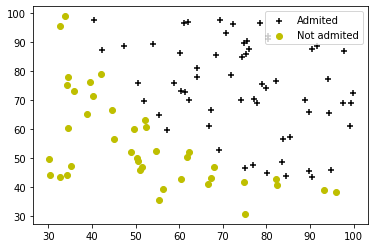

In [329]:
draw_graph("ex2data1.csv", ['Admited', 'Not admited'])

### 1.2. Función sigmoide

In [23]:
def sigmoide(Z):
    denominador = 1 + np.exp(Z)
    return (1/denominador)

### 1.3. Cálculo de la función de coste y su gradiente

In [314]:
def coste_logistico(T, X, Y):
    G = sigmoide(np.matmul(X, T))
    #falla porq G es todo unos no se muy bien porq
    coste = (- 1 / (len(X))) * (np.dot(Y, np.log(G)) + np.dot((1 - Y), np.log(1 - G)))
    return coste

In [309]:
def gradiente_logistico(T, X, Y):
    m = len(Y)
    G = sigmoide(np.matmul(X, T))
    Dif = (np.transpose(G) - Y)
    gradiente = (1/m)*np.dot(Dif, X)
    return gradiente

In [310]:
def descenso_gradiente(X, Y):
    n = len(Y)
    X_2 = np.hstack([np.ones([n,1]), X] )
    m = np.shape(X_2)[1]
    T = np.zeros([m,1])
    T = gradiente_logistico(T, X_2, Y)
    c = coste_logistico(T[0], X_2, Y)
    return T[0] , c

In [313]:
def main2():
    datos = carga_csv("ex2data1.csv")
    X = datos[:,:-1]
    Y = datos[:,-1]
    P , c = descenso_gradiente(X,Y)
    print(P, c)
    
main2()

[ -0.1        -12.00921659 -11.26284221] nan


<ipython-input-312-41a229fc9dc5>:3: RuntimeWarning: divide by zero encountered in log
  coste = (- 1 / (len(X))) * (np.dot(Y, np.log(G)) + np.dot((1 - Y), np.log(1 - G)))


### 1.4. Cálculo del valor óptimo de los parámetros

In [236]:
def optimiza():
    datos = carga_csv("ex2data1.csv")
    X = datos[:,:-1]
    Y = datos[:,-1]
    m = np.shape(X)[1]
    T = np.zeros([m,1])
    result = opt.fmin_tnc(func=coste_logistico, x0=T, fprime = gradiente_logistico,args=(X, Y))
    theta_opt = result[0]

In [315]:
optimiza()

### 1.5. Evaluación de la regresión logística

### PARTE 2
### Regresión logística regularizada
### 1.1. Visualización de los datos

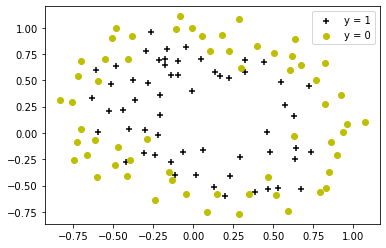

In [330]:
draw_graph("ex2data2.csv")